# TEAM 5: Climate Change Belief Analysis 2022

# 2.1 Introduction

The CEO of Tesla (Elon Musk) produces electric cars and solar pannels as a means to reduce the carbon footprint and climate change. He would like to know  how people perceive climate change and whether or not they believe it is a real threat. This would add to Tesla's  market research efforts in gauging how their products may be received. Elon Musk has asked his data science department to create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. Such information will help 

## Problem statement 

Tesla company has hired us to create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data

# Comet Experiment

The comet_ml is a user friendly platform that allows data scientists data scientists to automatically track their datasets, code changes, experimentation history, and production models (crunchbase.com). This tool will make collaboration and version control of the models possible.  

In [1]:
#Install Comet Machine learning 
!pip3 install comet_ml

In [2]:
#Join comet_ml workplace with the Jupiter notebook
# import comet_ml at the top of your file
from comet_ml import Experiment




In [3]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="xNqJopq8sX7bmkuhwQlf0HhUi",
    project_name="edsa-climate-change-belief-analysis-2022",
    workspace="david-gbenga",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/david-gbenga/edsa-climate-change-belief-analysis-2022/8629bf1f0dbd451bae28a0e9db5d94a7



In [4]:
conda install -c conda-forge scikit-surprise

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
! pip install wordcloud

#  Loading Dependencies

## Import the libraries

In [6]:
import nltk

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np 
import pandas as pd

import scipy as sp 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

import re

import warnings
warnings.filterwarnings('ignore')

# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

## Loading the data

In [7]:
df = pd.read_csv('train.csv')

## Data description 

The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

Source: Kaggle competition ( EDSA - Climate Change Belief Analysis 2022 )

# Exploratory Data Analysis

Exploratory Data analysis is a section in a data science project where the data scientist investigates and analse datasets by looking at their main characteristics. 

In [8]:
# Overview of data types  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


There are three column types namely; sentiment, message and tweeeid. As expected, the messages are categorical while the tweetid and sentiment are numerical  

In [9]:
# look at columns and rows 
df.shape

(15819, 3)

There are three columns and 15819 rows.  

In [10]:
# check for null values 
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [11]:
# value count
df.value_counts()

sentiment  message                                                                                                                                                                                                              tweetid
-1         #BillNye Grade school science guy spreading lie of climate change #CNN donna doesn't match truth does… https://t.co/zi4lfot0ru                                                                                       84006      1
 1         RT @mashable: Possibly the most beautiful and distinct sign of climate change https://t.co/u0KdiMwHk8                                                                                                                237234     1
           RT @mashable: Trump falsely claims that nobody knows if global warming is real https://t.co/uszV0jlRUu https://t.co/PvmYh984Id                                                                                       667336     1
           RT @mashable: Trump's order will begin to unra

The data is in great condition. There are no missing values. 

In [12]:
# look for duplicates 
df.duplicated().sum()

0

There are no duplicated values. We checked for Duplicates to see if tweet_id was repeated as this might mean one person's tweet would be used twice. 

In [13]:
# look at what the columns have 
df.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [14]:
# look at what the columns have 
df.tail()

sentiment                                            message  tweetid
15814          1  RT @ezlusztig: They took down the material on ...    22001
15815          2  RT @washingtonpost: How climate change could b...    17856
15816          0  notiven: RT: nytimesworld :What does Trump act...   384248
15817         -1  RT @sara8smiles: Hey liberals the climate chan...   819732
15818          0  RT @Chet_Cannon: .@kurteichenwald's 'climate c...   806319

The messages have special characters and stop words. Natural Languange Processing (NLP) can make this information easier to manage for model building by removing stop words and unneeded characters. 

Lets look at how the first three messages look like 

In [15]:
# check out the first message 
df['message'][0]

"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable"

In [16]:
# check out the second message
df['message'][1]

"It's not like we lack evidence of anthropogenic global warming"

In [17]:
# check out the third message
df['message'][2]

'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…'

In [18]:
# check out the last message
df['message'][15818]

"RT @Chet_Cannon: .@kurteichenwald's 'climate change equation' in 4 screenshots https://t.co/lp7UufcxDQ"

In the messages there are punctuation marks, website links and stop words. These are supposed to be removed during data cleaning process for a machine learning project to be built.   

## Splitting the sentiments data

In [19]:
# segregating dataframe for analyzing individual sentiments
news=df[(df['sentiment']==2)]
neutral=df[(df['sentiment']==0)]
pro=df[(df['sentiment']==1)]
anti=df[(df['sentiment']==-1)]


In [20]:
# check if instance was created 
news

sentiment                                            message  tweetid
2              2  RT @RawStory: Researchers say we have three ye...   698562
12             2  RT @tveitdal: We only have a 5 percent chance ...   454673
14             2  Fossil fuel giant ExxonMobil ‘misled’ the publ...   658092
26             2  Bangladesh confronting climate change head on ...   365291
32             2  RT @latimes: Atmospheric rivers fueled by clim...   143471
36             2  RT @Independent: Trump's team removed climate ...   526603
41             2  2050 climate targets: nations are playing the ...     8984
44             2  RT @washingtonpost: The Alaskan tundra is fill...   905639
45             2  RT @TheTorontoSun: From @sunlorrie: Indian env...   741568
49             2  RT @Starbuck: World food supplies at risk as #...   499888
50             2  RT @FoxNews: Macron: My charm may have changed...   310105
61             2  These House Republicans say climate change is ...   650843
63             2  RT @kylegriffin1: NYT reviewed a draft climate...   709019
66             2  RT @BBCBreaking: UK government signs Paris Agr...   827355
99             2  U.S. environmental agency chief says humans co...   554354
102            2  RT @thinkprogress: Where are Rex Tillerson’s c...    12265
106            2  80% of GHG via resevoirs are methane. Resevoir...   540020
108            2  RT @GreenHarvard: “Universities have a uniquel...    55935
110            2  RT @PopSci: Ten of the ugliest animals threate...   841527
117            2  Syfy's 'Incorporated' imagines future ravaged ...   946866
120            2  RT @NYTNational: White House budget proposal o...   677366
132            2  Air pollution deaths expected to rise due to c...   952302
133            2  Labour, budgeting and climate change (2) - The...   257727
138            2  RT @foxandfriends: New Catholic priests expect...   976934
139            2  RT @SasjaBeslik: Meet ChinaÃ¢â‚¬â„¢s 'ecologic...   817908
140            2  China warns Trump against abandoning climate c...   841838
141            2  Science to the rescue as climate change threat...   741156
165            2  RT @SafetyPinDaily: US federal department is c...   927628
169            2  Conservative columnist under siege after N.Y. ...    94360
172            2  RT @IndyUSA: Trump's budget director just said...   182475
175            2  Trudeau must put emphasis on defence if he wan...    60490
178            2  RT @thehill: Rahm Emanuel posts climate change...   893985
186            2  RT @Energydesk: Historic coal fall may have pr...   568524
188            2  RT @LiterateLiberal: Leading global warming de...   545019
190            2  RT @pablorodas: #CLIMATEchange #p2 RT West Coa...    13794
191            2  RT @EcoInternet3: U.S. Secretary of State, Rex...   442461
192            2  Stephen Hawking has a message for Trump: Don't...   878308
193            2  RT @telesurenglish: One of Jamaica’s iconic be...   141981
199            2  RT @NZaegel: Effects of climate change may 'wr...   857614
203            2  RT @thinkprogress: Brace yourself for a bitter...   342484
205            2  RT @business: China tells Trump climate change...   646282
208            2  RT @climatekeith: Saskatchewan AG: Provincial ...   381570
210            2  RT @Energydesk: Exxon shareholders have moved ...   682129
213            2  RT @nature_org: World leaders reaffirm their c...   178539
215            2  RT @EcoInternet3: John Roughan: We will miss a...     6476
222            2  RT @HuffingtonPost: China to Trump: climate ch...   200876
223            2  RT @businessinsider: Apple is borrowing $1 bil...   368402
225            2  RT @brady_dennis: CDC abruptly cancels long-pl...   353363
228            2  RT @PopSci: A river in Canada just turned to p...   324552
235            2  RT @TheDailyClimate: Frogs heading uphill to e...   111621
236            2  US climate change campaigner dies snorkeling a...   465275
239

Use word cloud to understand the most used words in each sentiment category.  

Text(0.5, 1.0, 'Word cloud for news views')

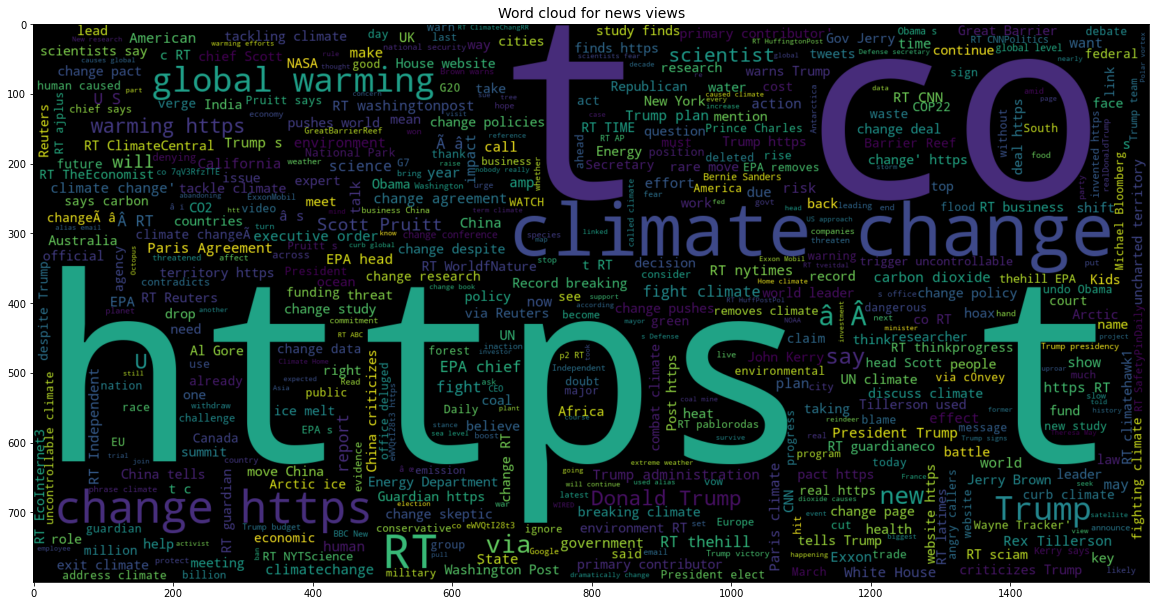

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(news.message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for news views',fontsize=14)

It makes sense that the https and climate change are outstanding keywords as the news come from a certain website and climate change is the topic of interest. Words such as  Donald Trump appear because he was the president of the United States since 2017 and he had controversial views againist effects of climate change.  

Text(0.5, 1.0, 'Word cloud for neutral views')

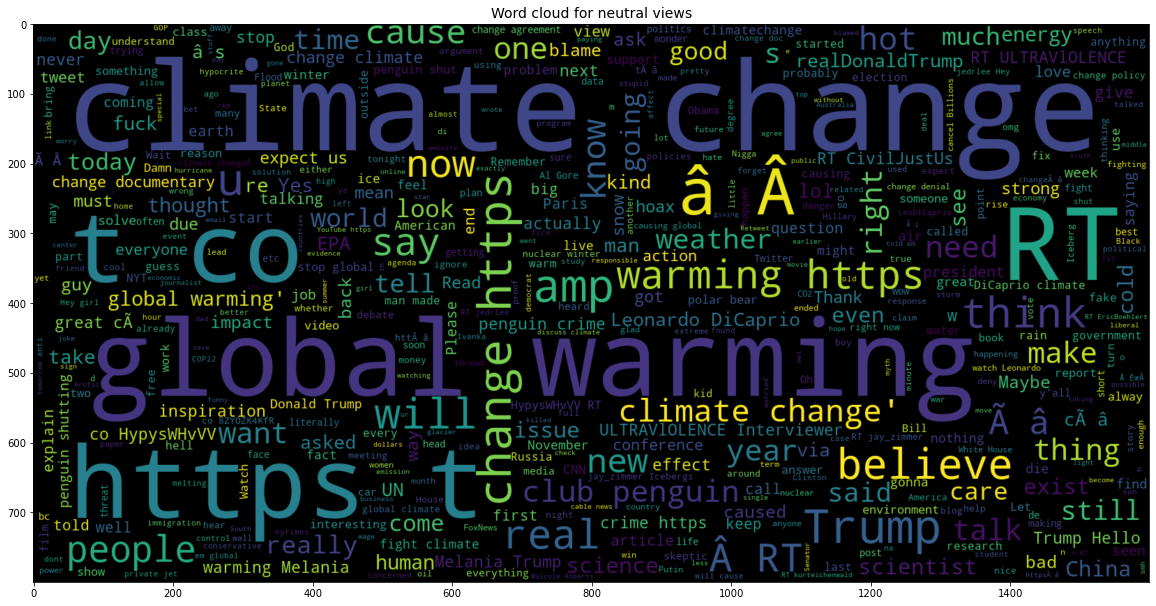

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(neutral.message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for neutral views',fontsize=14)

The neutral group has similar word cloud as the news. Using neutral words such as climate change and global warming. They seem to reference many news sources as https is still prominet in this field. 

Text(0.5, 1.0, 'Word cloud for pro-climate views')

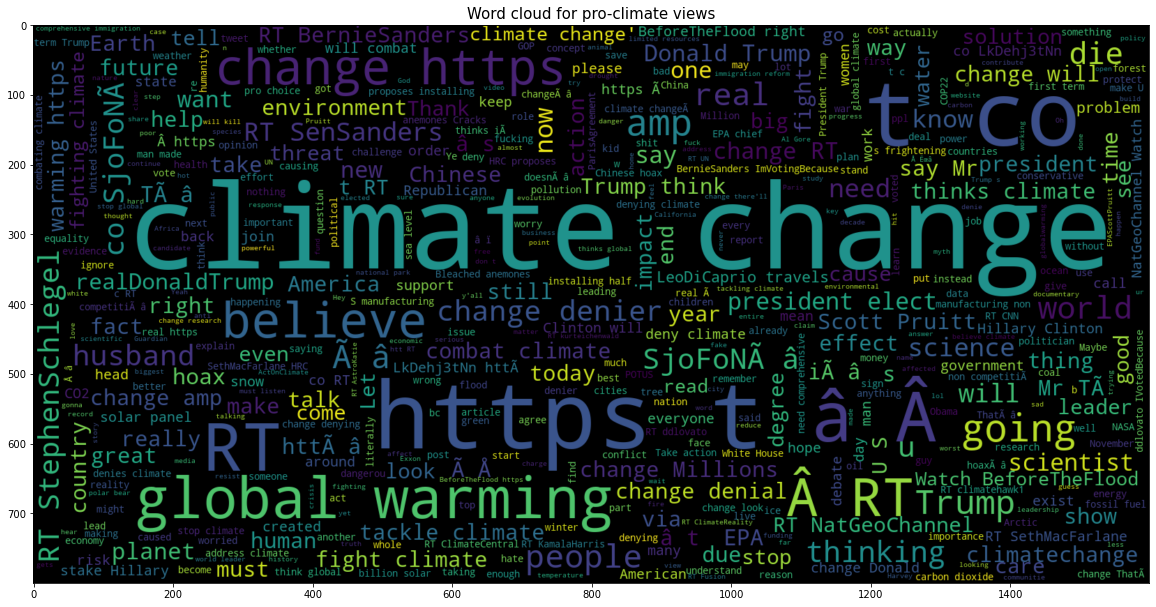

In [23]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(pro.message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for pro-climate views',fontsize=15)

Text(0.5, 1.0, 'Word cloud for anti-climate views')

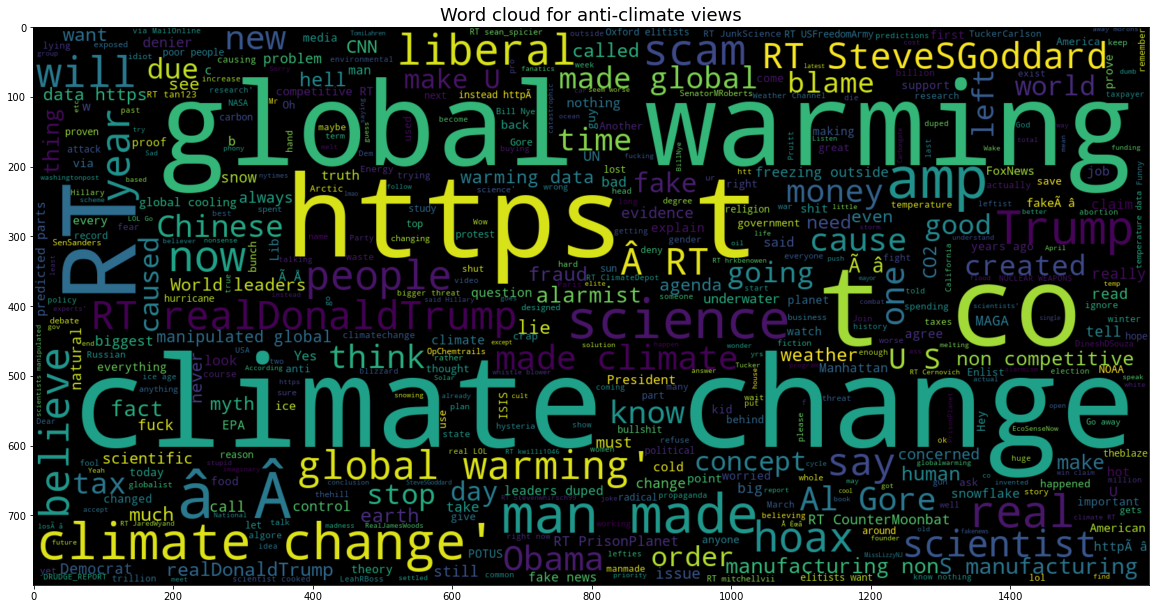

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(anti.message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for anti-climate views',fontsize=18)

In this group interesting words such as manmade, created, believe, liberal, hoax are prominent. These words are showing disbelief. 

Now that we have the wordcloud, we can look at how the sentiments are distributed in the data using a bar graph and pie chart 

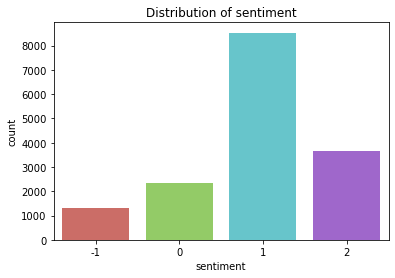

In [25]:
# A sentiment bar graph plot 
sns.countplot(x = 'sentiment', data = df, palette="hls")
plt.title("Distribution of sentiment");

From the bar chart we can see that the ammount of data on each sentiment category is unbalanced. Class imbalance if unhandled, can create a biased model. Its important that the this is resolved in the data processing 

In [26]:
# do a pie chart plot of the sentiments 


# Data Engineering 

Data engineering  is a section in a data science project where the data scientist cleans and formats data in such a way that modeling is feasible on the data. In this stage we will perform Natural Language Processing.  

In [27]:
!pip install ms-teams

In [28]:

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from bs4 import BeautifulSoup
import re

porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # remove all numbers with letters attached to them
    #alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    stop = stopwords.words('english')
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmatizer = WordNetLemmatizer()
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Revolve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Revolve\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
df['message_clean'] = df['message'].apply(review_to_words)

In [30]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

In [31]:
df.head()

sentiment  \
0  1           
1  1           
2  2           
3  1           
4  1           

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1  It's not like we lack evidence of anthropogenic global warming                                                                                 
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3  #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD                                            
4  RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight                     

   tweetid  \
0  625221    
1  126103    
2  698562    
3  573736    
4  466954    

                                                                                                message_clean  
0  polyscimajor epa chief think carbon dioxide main cause global warming wait http co yelvcefxkc via mashable  
1  like lack evidence anthropogenic global warming                                                             
2  rt rawstory researcher say three year act climate change late http co wdt kdur f http co z anpt             
3  todayinmaker wired pivotal year war climate change http co wotxtlcd                                         
4  rt soynoviodetodas racist sexist climate change denying bigot leading poll electionnight

In [32]:
df.drop(['message'], axis=1, inplace= True)

In [33]:
df.head()

sentiment  tweetid  \
0  1          625221    
1  1          126103    
2  2          698562    
3  1          573736    
4  1          466954    

                                                                                                message_clean  
0  polyscimajor epa chief think carbon dioxide main cause global warming wait http co yelvcefxkc via mashable  
1  like lack evidence anthropogenic global warming                                                             
2  rt rawstory researcher say three year act climate change late http co wdt kdur f http co z anpt             
3  todayinmaker wired pivotal year war climate change http co wotxtlcd                                         
4  rt soynoviodetodas racist sexist climate change denying bigot leading poll electionnight

 ## Text feature extraction

In [34]:
x_value=df['message_clean']
y=df['sentiment']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_value, y,stratify=y,test_size=0.2, random_state=0)

In [36]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Bag of words 

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [38]:
count_train


<12655x26253 sparse matrix of type '<class 'numpy.int64'>'
	with 150574 stored elements in Compressed Sparse Row format>

##  Machine Learning Model : Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 
from sklearn.metrics import accuracy_score
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

#cm = metrics.confusion_matrix(y_test, pred, labels=['2', '0','1','-1'])
#plot_confusion_matrix(cm, classes=['2', '0','1','-1'])

accuracy:   0.692


In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)


accuracy:   0.715


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

In [42]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.601


 ## Machine Learning Model TFIDF

In [43]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.721


 ## TFIDF: Bigrams

In [44]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

In [45]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.745


## TFIDF : Trigrams

In [46]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.739


In [47]:
test_df = pd.read_csv('test.csv')

In [48]:
test_df.head()

message  \
0  Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq                     
1  Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj          
2  The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..   
3  @Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax   
4  RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican                                                              

   tweetid  
0  169760   
1  35326    
2  224985   
3  476263   
4  872928

In [49]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # remove all numbers with letters attached to them
    #alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    stop = stopwords.words('english')
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmatizer = WordNetLemmatizer()
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [50]:
test_df['message_clean'] = test_df['message'].apply(review_to_words)

In [51]:
test_df.head()

message  \
0  Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq                     
1  Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj          
2  The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..   
3  @Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax   
4  RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican                                                              

   tweetid  \
0  169760    
1  35326     
2  224985    
3  476263    
4  872928    

                                                                                                 message_clean  
0  europe looking china make sure alone fighting climate change http co rcgwdq                                  
1  combine polling staffer climate change woman right fascist state http co ifrm eexpj                          
2  scary unimpeachable evidence climate change already http co yaedqcv ki itstimetochange climatechange zeroco  
3  karoli morgfair osborneink dailykos putin got jill trump believe climate change think hoax                   
4  rt fakewillmoore female orgasm cause global warming sarcastic republican

In [52]:
test_df.drop(['message','tweetid'], axis=1, inplace= True)

In [58]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_test = tfidf_vectorizer2.fit_transform(test_df)


ValueError: max_df corresponds to < documents than min_df

In [59]:
y_pred=pass_tf.predict(tfidf_test)

ValueError: X has 26253 features per sample; expecting 195053

In [ ]:
submission1= pd.DataFrame(zip(test_df.tweetid.values,y_pred),columns=['tweetid','sentiment'])

In [ ]:
submission1.head()

In [ ]:
submission1.to_csv('BigramsTF.csv',index=False, index_label= False)

In [ ]:
experiment.end()

# References 

https://www.crunchbase.com/organization/comet-ml